---
### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import waterfall_chart

from itertools import combinations
from scipy.special import comb

# from sklearn.model_selection import train_test_split as tts

In [2]:
from xgboost import XGBRegressor

---
### Loading the dataset

In [3]:
boston_df = pd.read_csv('boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston_df.dropna(axis=0, inplace=True)
boston_df.reset_index(drop=True, inplace=True)

In [6]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [7]:
selected_features = ['AGE', 'RAD', 'TAX', 'DIS', 'RM',
                     'LSTAT', 'B', 'INDUS', 'CHAS']

In [8]:
X = boston_df[selected_features]
y = boston_df.MEDV

In [9]:
X.head()

,AGE,RAD,TAX,DIS,RM,LSTAT,B,INDUS,CHAS
0,65.2,1,296,4.0900,6.575,4.98,396.90,2.31,0.0
1,78.9,2,242,4.9671,6.421,9.14,396.90,7.07,0.0
2,61.1,2,242,4.9671,7.185,4.03,392.83,7.07,0.0
3,45.8,3,222,6.0622,6.998,2.94,394.63,2.18,0.0
4,58.7,3,222,6.0622,6.430,5.21,394.12,2.18,0.0


In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    28.7
Name: MEDV, dtype: float64

In [11]:
# X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

---
### Training an uninterpretable model

In [12]:
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

---
### SHAP Implementation

In [13]:
def coalition_worth(model, X_train, sample, coalition):
    """
    returns the mean prediction value of the model for the given coalition of features
    """
    coalition_features = {feature: sample[feature] for feature in coalition} 
    
    return model.predict(X_train.assign(**coalition_features)).mean()

In [14]:
def generate_coalitions(sample, excluded_feature):
    """
    generates all possible coalitions of features for a given data point, excluding a specific feature
    """
    remaining_features = [feature for feature in sample.index if feature != excluded_feature]
    
    for feature_count in range(len(remaining_features)+1):
        for coalition in combinations(remaining_features, feature_count):
            yield list(coalition)

In [15]:
def coalition_contribution(model, X_train, sample, excluded_feature, coalition):
    """
    returns the contribution of adding a feature to a coalition
    """
    # ({S U i}) - ({S})
    marginal_gain = coalition_worth(model, X_train, sample, coalition+[excluded_feature]) \
        - coalition_worth(model, X_train, sample, coalition)
    
    # |S|! (|F|-|S|-1)! / |F|!
    num_coalitions = 1 / (comb(len(sample)-1,len(coalition)) * len(sample))
    
    return num_coalitions*marginal_gain

In [16]:
def calculate_shap_values(model, X_train, X_sample):
    """
    returns
        the average model prediction,
        list of SHAP values for each data point in the input sample
    """
    shap_values_list = []
    
    features = X_train.columns
    num_sample_points = X_sample.shape[0]
    
    for each in range(num_sample_points):
        sample = X_sample.iloc[each]
        shap_values = []
        for feature in features:
            shap_value =  np.sum([coalition_contribution(model, X_train, sample, feature, coalition)
                                  for coalition in generate_coalitions(sample, feature)])
            shap_values.append(shap_value)
        shap_values_list.append(shap_values)

    phi0 = np.average(model.predict(X_train))
    
    return phi0, shap_values_list

In [17]:
X_train = X[selected_features].iloc[:100]

# taking a random sample
X_sample = X[selected_features][201:202].copy()

In [18]:
# calculating SHAP values for the sample
shap_values = calculate_shap_values(model, X_train, X_sample)
shap_values

(22.088957,
 [[-0.7609749862125943,
   0.19661993072146464,
   0.6696423235393706,
   2.0421949136824833,
   9.138243368693761,
   1.744221426191784,
   0.13357436543419246,
   0.7672972156887963,
   0.0]])

---
### Visual Analysis

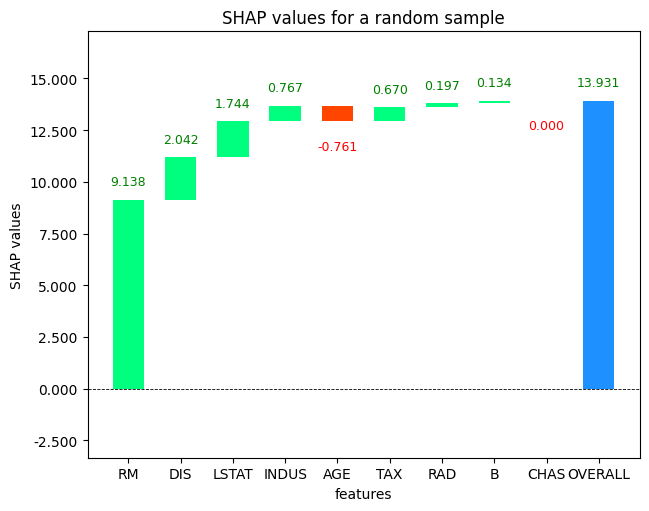

In [19]:
a = selected_features
b = shap_values[1][0]

waterfall_chart.plot(a, b, sorted_value=True, green_color='springgreen', red_color='orangered',
                     formatting='{:,.3f}',  blue_color='dodgerblue',
                     net_label='OVERALL', rotation_value=0)
plt.title('SHAP values for a random sample')
plt.xlabel('features')
plt.ylabel('SHAP values')
plt.show()

---